In [6]:
import pandas as pd
import os
from glob import glob

#Step 1: Path to 'uber-data' inside Downloads
uber_data_folder = os.path.expanduser("~/Downloads/uber-data")  

#Step 2: Grab all matching CSV files
file_paths = glob(os.path.join(uber_data_folder, "uber-raw-data-*.csv"))

print("Found files:")
for f in file_paths:
    print(f)

#Step 3: Load each file into a list
combined_data = []
for file in file_paths:
    try:
        df = pd.read_csv(file)
        df['Date/Time'] = pd.to_datetime(df['Date/Time'])
        combined_data.append(df)
    except Exception as e:
        print(f"Error loading {file}: {e}")

#Step 4: Concatenate all
if combined_data:
    uber_df = pd.concat(combined_data, ignore_index=True)
    print(f"Combined shape: {uber_df.shape}")
else:
    print("No files loaded. Please check file paths or folder name.")

Found files:
/Users/shauryadityasingh/Downloads/uber-data/uber-raw-data-apr14.csv
/Users/shauryadityasingh/Downloads/uber-data/uber-raw-data-aug14.csv
/Users/shauryadityasingh/Downloads/uber-data/uber-raw-data-sep14.csv
/Users/shauryadityasingh/Downloads/uber-data/uber-raw-data-jul14.csv
/Users/shauryadityasingh/Downloads/uber-data/uber-raw-data-jun14.csv
/Users/shauryadityasingh/Downloads/uber-data/uber-raw-data-may14.csv
Combined shape: (4534327, 4)


In [7]:
uber_df.head(50)

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512
5,2014-04-01 00:33:00,40.7383,-74.0403,B02512
6,2014-04-01 00:39:00,40.7223,-73.9887,B02512
7,2014-04-01 00:45:00,40.7620,-73.9790,B02512
8,2014-04-01 00:55:00,40.7524,-73.9960,B02512
9,2014-04-01 01:01:00,40.7575,-73.9846,B02512


In [9]:
#Step 1: Extract features from Date/Time
uber_df['Hour'] = uber_df['Date/Time'].dt.hour
uber_df['Day'] = uber_df['Date/Time'].dt.day
uber_df['Weekday'] = uber_df['Date/Time'].dt.weekday
uber_df['Month'] = uber_df['Date/Time'].dt.month
uber_df['Date'] = uber_df['Date/Time'].dt.date
uber_df['Datetime_Hour'] = uber_df['Date/Time'].dt.floor('h')  # Rounding to nearest hour

#Step 2: Group by hourly timestamp
hourly_trips = uber_df.groupby('Datetime_Hour').size().reset_index(name='Trip_Count')

#Step 3: Save cleaned output
hourly_trips.to_csv("uber_hourly_trip_data.csv", index=False)
print("Saved: uber_hourly_trip_data.csv")


Saved: uber_hourly_trip_data.csv


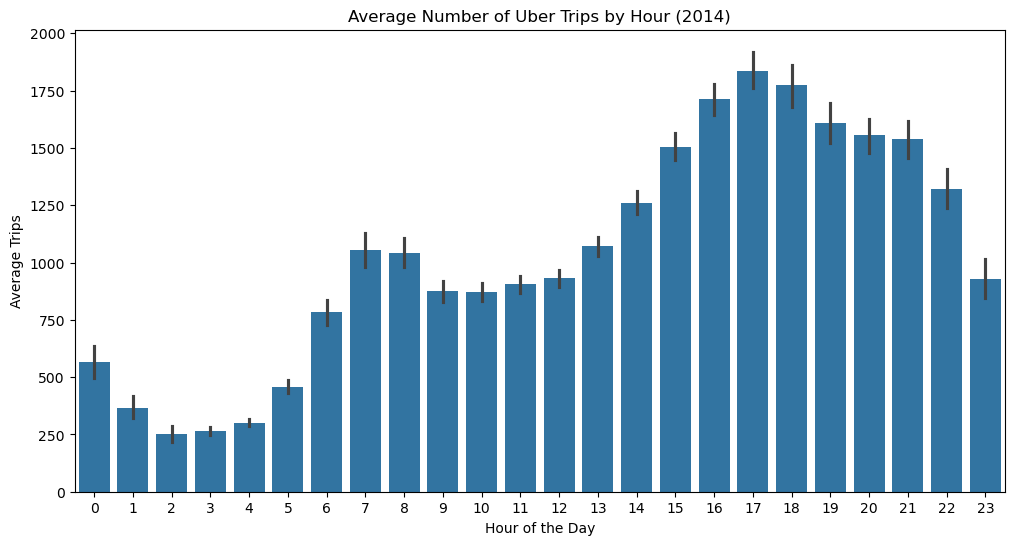

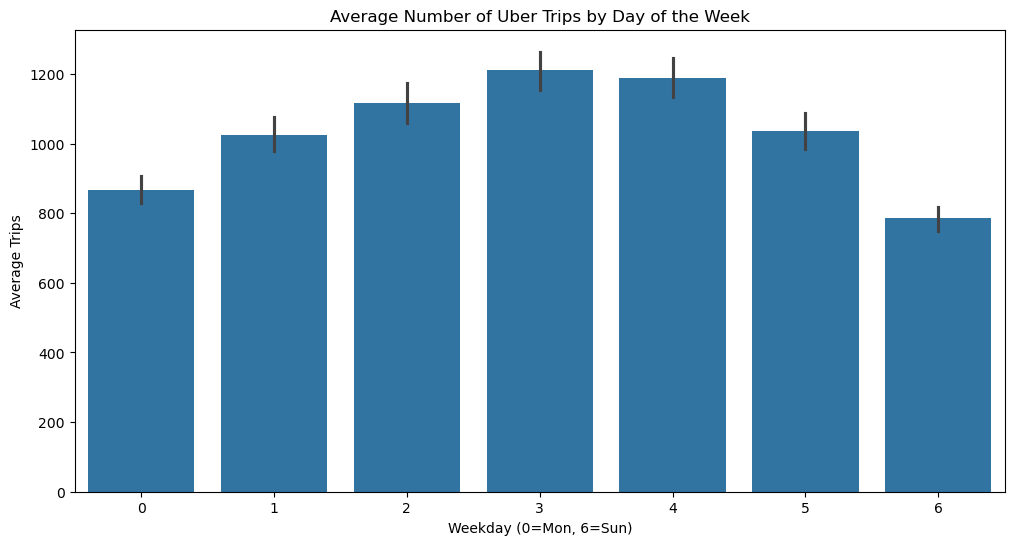

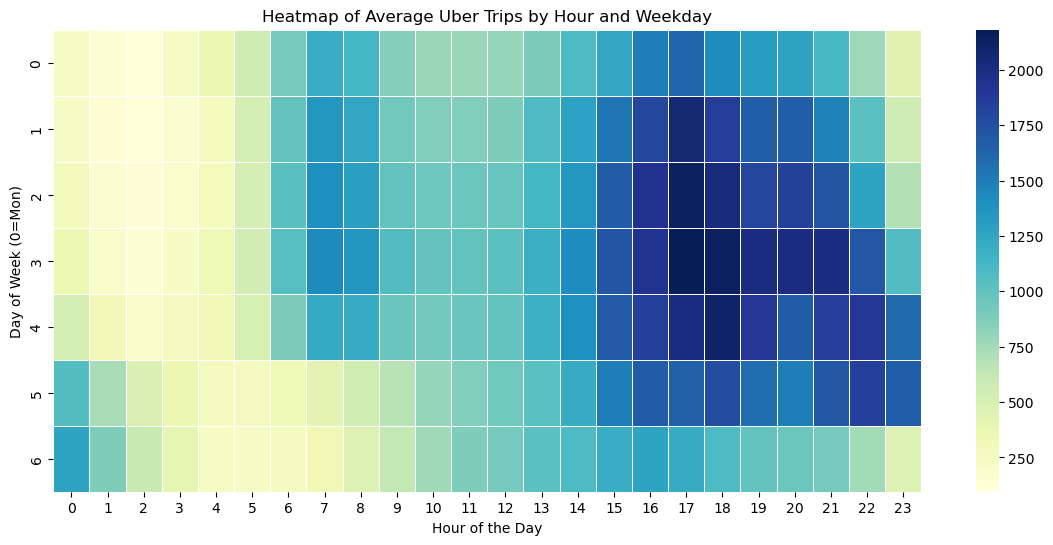

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#hourly_trips = pd.read_csv("uber_hourly_trip_data.csv", parse_dates=['Datetime_Hour'])

# Extract additional time info
hourly_trips['Hour'] = hourly_trips['Datetime_Hour'].dt.hour
hourly_trips['Weekday'] = hourly_trips['Datetime_Hour'].dt.dayofweek
hourly_trips['Date'] = hourly_trips['Datetime_Hour'].dt.date

#1. Plot trips per hour (overall)
plt.figure(figsize=(12,6))
sns.barplot(x='Hour', y='Trip_Count', data=hourly_trips)
plt.title('Average Number of Uber Trips by Hour (2014)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trips')
plt.show()

#2. Plot trips per weekday
plt.figure(figsize=(12,6))
sns.barplot(x='Weekday', y='Trip_Count', data=hourly_trips)
plt.title('Average Number of Uber Trips by Day of the Week')
plt.xlabel('Weekday (0=Mon, 6=Sun)')
plt.ylabel('Average Trips')
plt.show()

#3. Heatmap: Hour vs Weekday
pivot_table = hourly_trips.pivot_table(index='Weekday', columns='Hour', values='Trip_Count', aggfunc='mean')

plt.figure(figsize=(14,6))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=0.5)
plt.title('Heatmap of Average Uber Trips by Hour and Weekday')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of Week (0=Mon)')
plt.show()


In [14]:
# Set datetime index
hourly_trips_ts = hourly_trips.set_index('Datetime_Hour').asfreq('h')  # fill gaps

# Fill any missing values if needed (safely)
hourly_trips_ts['Trip_Count'] = hourly_trips_ts['Trip_Count'].ffill()


In [15]:
# Create lag features
for lag in range(1, 25):  # last 24 hours
    hourly_trips_ts[f'lag_{lag}'] = hourly_trips_ts['Trip_Count'].shift(lag)

# Drop NA rows from lagging
hourly_trips_ts = hourly_trips_ts.dropna()


In [18]:
# 80% train, 20% test
split_index = int(len(hourly_trips_ts) * 0.8)
train = hourly_trips_ts.iloc[:split_index]
test = hourly_trips_ts.iloc[split_index:]

X_train = train.drop(columns='Trip_Count')
y_train = train['Trip_Count']
X_test = test.drop(columns='Trip_Count')
y_test = test['Trip_Count']


In [19]:
# Keep only numeric columns for XGBoost
X_train = X_train.select_dtypes(include=['int64', 'float64', 'int32', 'float32'])
X_test = X_test.select_dtypes(include=['int64', 'float64', 'int32', 'float32'])


In [20]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)
model.fit(X_train, y_train)

preds = model.predict(X_test)


In [21]:
import numpy as np

mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - preds) / y_test)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 138.08
RMSE: 206.95
MAPE: 11.19%


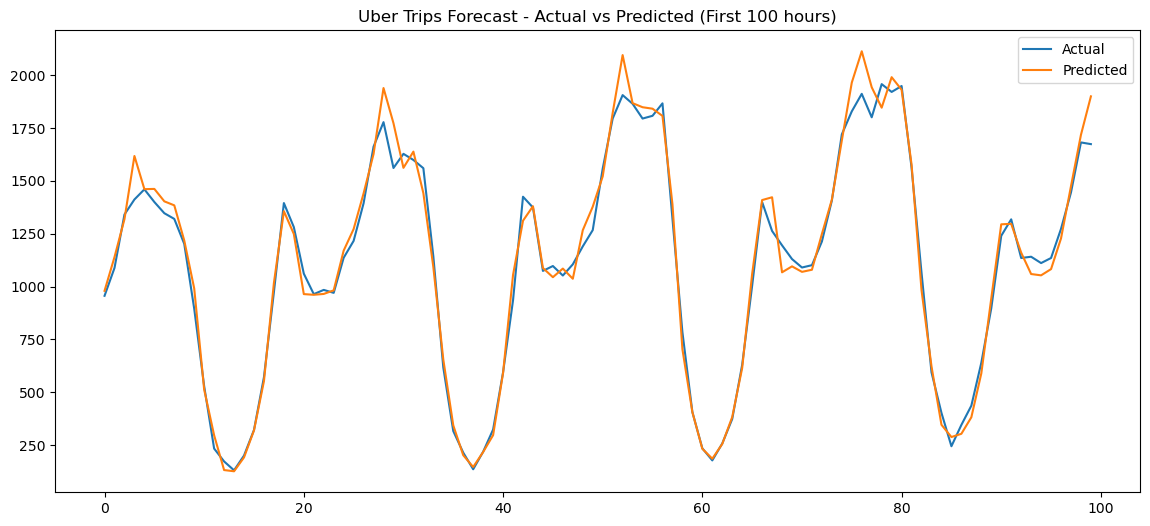

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(preds[:100], label='Predicted')
plt.legend()
plt.title("Uber Trips Forecast - Actual vs Predicted (First 100 hours)")
plt.show()


In [24]:
from prophet import Prophet

# Use your hourly trip data
df_prophet = hourly_trips.copy()
df_prophet = df_prophet.rename(columns={"Datetime_Hour": "ds", "Trip_Count": "y"})

In [25]:
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=False,  # We don’t have a full year of data
    changepoint_range=0.9
)
model.fit(df_prophet)

14:49:31 - cmdstanpy - INFO - Chain [1] start processing
14:49:31 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
# Create a dataframe for future 100 hours
future = model.make_future_dataframe(periods=100, freq='h')  # H = Hourly
forecast = model.predict(future)

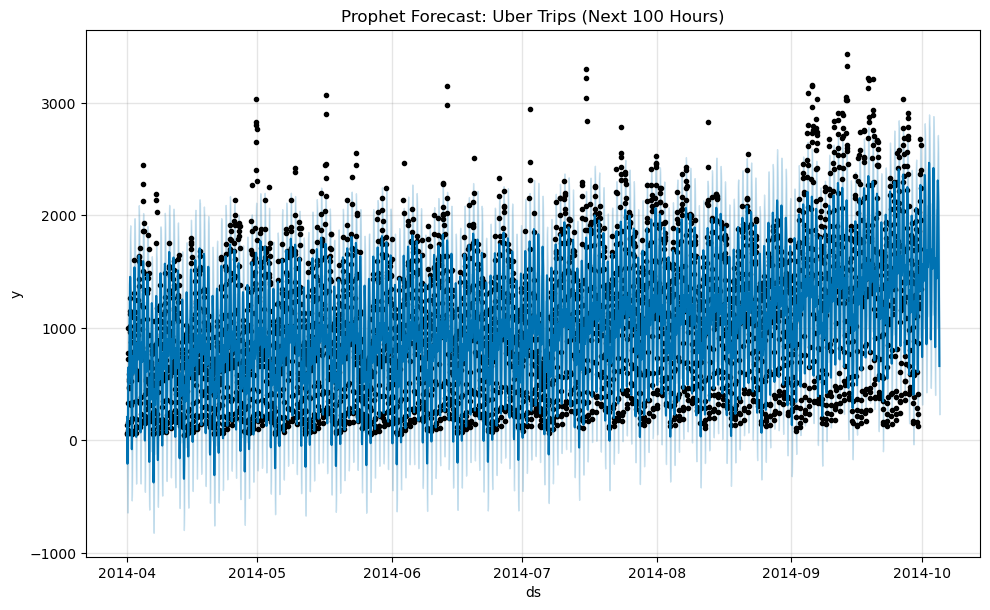

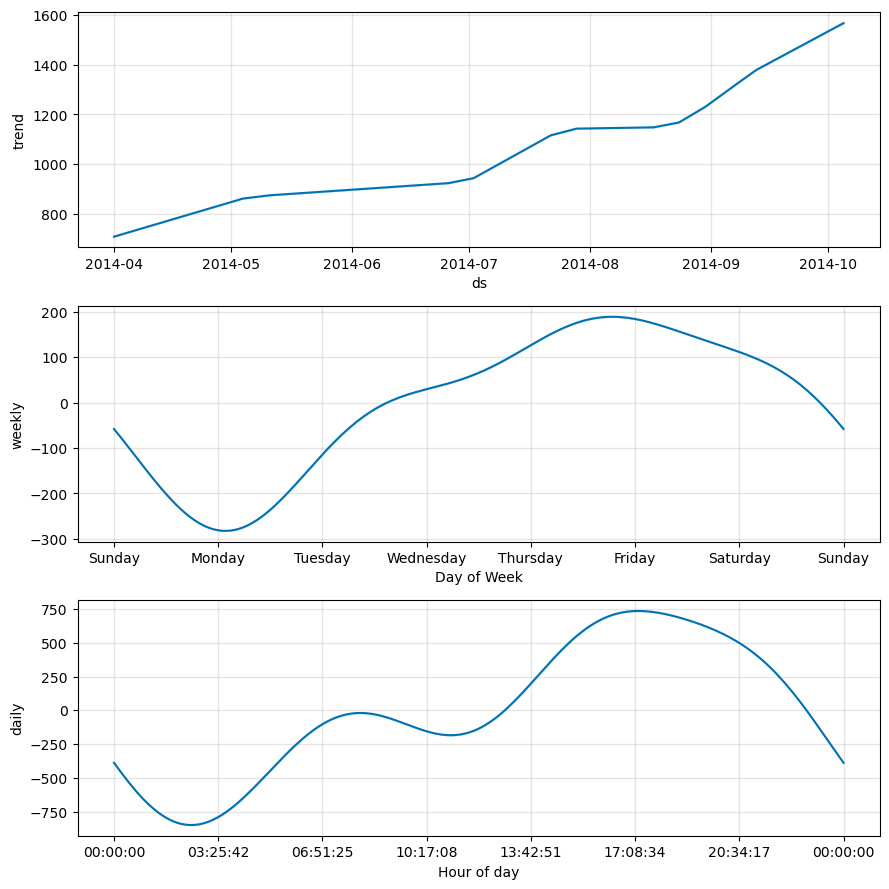

In [27]:
# Plot forecast
fig1 = model.plot(forecast)
plt.title("Prophet Forecast: Uber Trips (Next 100 Hours)")
plt.show()

# Plot components: trend, weekly, daily seasonality
fig2 = model.plot_components(forecast)
plt.show()

In [28]:
# Join forecast with original data to compare last 100 known points
df_merged = df_prophet.set_index('ds').join(forecast.set_index('ds')[['yhat']], how='inner')

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = df_merged['y'][-100:]
y_pred = df_merged['yhat'][-100:]

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"Prophet MAE: {mae:.2f}")
print(f"Prophet RMSE: {rmse:.2f}")
print(f"Prophet MAPE: {mape:.2f}%")

Prophet MAE: 349.24
Prophet RMSE: 443.37
Prophet MAPE: 45.43%


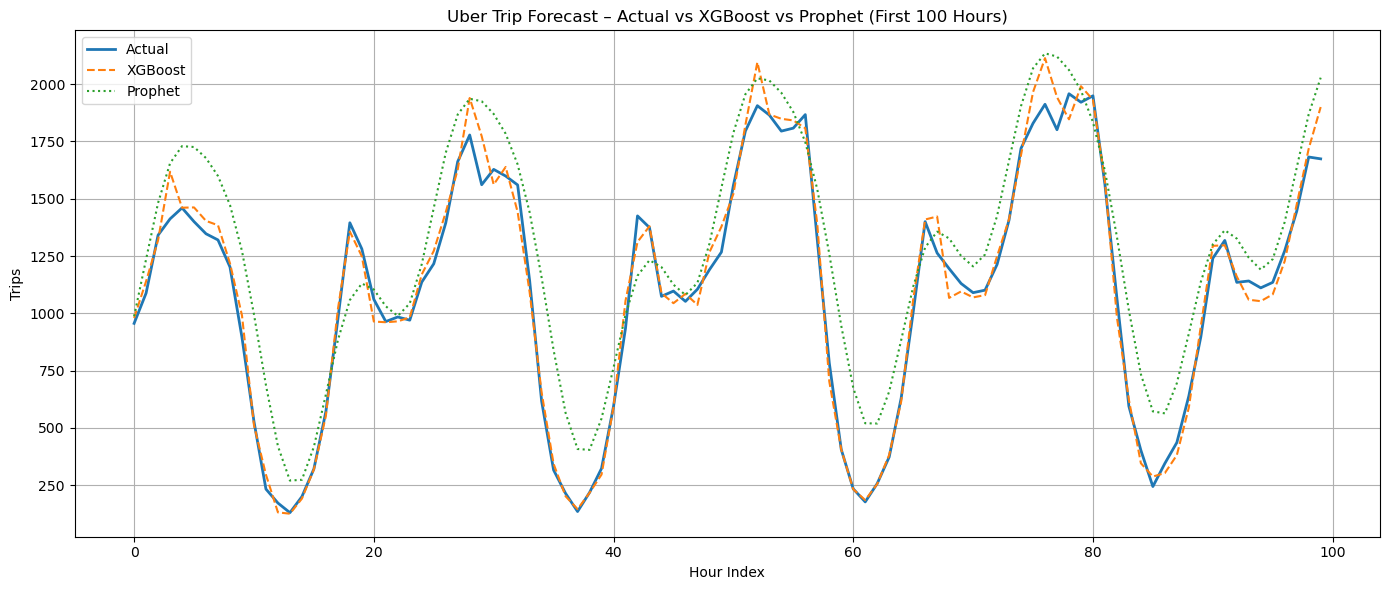

In [29]:
import matplotlib.pyplot as plt

# Extract matching Prophet predictions for the same period as y_test
# Get last 100 from Prophet aligned with y_test's index
prophet_preds = forecast.set_index('ds').loc[y_test.index[:100], 'yhat']

# XGBoost comparison plot vs Prophet
plt.figure(figsize=(14,6))
plt.plot(y_test.values[:100], label='Actual', linewidth=2)
plt.plot(preds[:100], label='XGBoost', linestyle='--')
plt.plot(prophet_preds.values, label='Prophet', linestyle=':')
plt.title("Uber Trip Forecast – Actual vs XGBoost vs Prophet (First 100 Hours)")
plt.xlabel("Hour Index")
plt.ylabel("Trips")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("comparison_xgboost_vs_prophet.png")
plt.show()